<a href="https://colab.research.google.com/github/sahupra1357/TensorflowCertification/blob/main/ImageClassificationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from history import plot_history, save_history

In [2]:
train_url = 'https://storage.googleapis.com/ibeans/train.zip'
val_url = 'https://storage.googleapis.com/ibeans/validation.zip'
test_url = 'https://storage.googleapis.com/ibeans/test.zip'

In [3]:
cache_dir = './data'
cache_subdir = 'ibeans'

train_files = tf.keras.utils.get_file('train.zip', train_url, extract=True, cache_dir=cache_dir,cache_subdir=cache_subdir)
val_files = tf.keras.utils.get_file('validation.zip', val_url, extract=True, cache_dir=cache_dir,cache_subdir=cache_subdir)
test_files = tf.keras.utils.get_file('test.zip', test_url, extract=True, cache_dir=cache_dir,cache_subdir=cache_subdir)

17708541/17708541 [==============================] - 0s 0us/step


In [4]:
!ls

sample_data


In [5]:
!wget 'https://storage.googleapis.com/ibeans/train.zip'
!wget  'https://storage.googleapis.com/ibeans/validation.zip'
!wget  'https://storage.googleapis.com/ibeans/test.zip'


--2024-02-20 00:32:36--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  86.5MB/s    in 1.6s    

2024-02-20 00:32:38 (86.5 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2024-02-20 00:32:38--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===========

In [6]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [7]:
unzip_data("train.zip")


In [8]:
unzip_data('validation.zip')
unzip_data('test.zip')

In [9]:
!ls

sample_data  test  test.zip  train  train.zip  validation  validation.zip


In [10]:
IMG_SIZE = (128, 128)
data_directory = f'{cache_dir}/{cache_subdir}'
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory="train",
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory="validation",
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)  # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory="test",
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical")

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


In [11]:
for img, label in train_data.take(1):
  print(img[0,1,:],label)

tf.Tensor(
[[7.95708008e+01 1.07811768e+02 4.00773926e+01]
 [8.32751465e+01 1.05067871e+02 3.94084473e+01]
 [5.94819336e+01 6.86867676e+01 2.16142578e+01]
 [6.92104492e+01 6.80683594e+01 2.79589844e+01]
 [1.06446777e+02 1.15621826e+02 6.40434570e+01]
 [5.10471191e+01 4.96564941e+01 2.08896484e+01]
 [4.73688965e+01 3.71899414e+01 1.13532715e+01]
 [1.12704590e+02 1.07444336e+02 5.68403320e+01]
 [1.24035645e+02 1.18153076e+02 7.19575195e+01]
 [9.56679688e+01 1.18777100e+02 5.62465820e+01]
 [1.07545898e+02 1.52684326e+02 8.57602539e+01]
 [8.62922363e+01 1.30015625e+02 5.58234863e+01]
 [8.72187500e+01 1.26149170e+02 5.43991699e+01]
 [9.11357422e+01 8.89074707e+01 6.09047852e+01]
 [9.29069824e+01 9.67038574e+01 5.96367188e+01]
 [8.69758301e+01 7.45227051e+01 3.77246094e+01]
 [8.54230957e+01 7.01105957e+01 3.94819336e+01]
 [4.97370605e+01 5.14787598e+01 2.32250977e+01]
 [3.82248535e+01 4.89904785e+01 2.40686035e+01]
 [3.40510254e+01 4.26931152e+01 1.92939453e+01]
 [3.15700684e+01 3.76638184e+

In [12]:
for img, label in test_data.take(1):
  print(img[0,1,:],label)

tf.Tensor(
[[1.08638916e+02 8.61923828e+01 6.06298828e+01]
 [1.40207275e+02 1.09847900e+02 8.31291504e+01]
 [1.21412842e+02 9.16784668e+01 5.76784668e+01]
 [1.18876953e+02 8.98769531e+01 5.60004883e+01]
 [1.25547119e+02 9.52658691e+01 6.57502441e+01]
 [1.03290039e+02 7.39306641e+01 3.99306641e+01]
 [1.15873535e+02 8.44128418e+01 5.25847168e+01]
 [1.37818115e+02 1.04687988e+02 7.40783691e+01]
 [1.53247314e+02 1.19606689e+02 9.05285645e+01]
 [1.56201172e+02 1.24638916e+02 9.27011719e+01]
 [1.68890381e+02 1.48758789e+02 1.16640381e+02]
 [1.65168945e+02 1.49809570e+02 1.15731445e+02]
 [1.39599121e+02 1.20465576e+02 8.20749512e+01]
 [1.24959229e+02 1.02959229e+02 6.46779785e+01]
 [1.16729736e+02 9.56516113e+01 6.30109863e+01]
 [1.31330322e+02 1.10145264e+02 7.74409180e+01]
 [1.19216553e+02 9.58571777e+01 6.18571777e+01]
 [1.23120361e+02 1.01979736e+02 8.05578613e+01]
 [1.19775146e+02 1.08256836e+02 7.26413574e+01]
 [1.55802490e+02 1.75122070e+02 9.50070801e+01]
 [1.83383057e+02 2.28325195e+

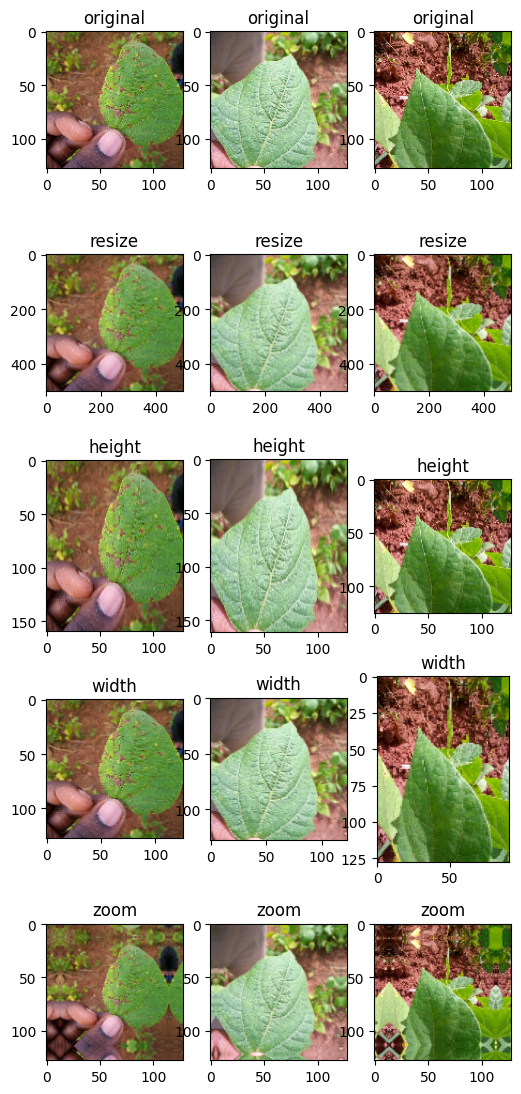

In [13]:
import matplotlib.pyplot as plt
resize = tf.keras.layers.Resizing(500, 500)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)

# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))

for images, labels in train_data.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # height
        ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("height")
        # width
        ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("width")
        # zoom
        ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("zoom")
plt.show()

In [14]:
data_augmentation_train_new = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),#, input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    #tf.keras.layers.RandomZoom(0.2),
    #tf.keras.layers.Rescaling(1./255), # keep for ResNet50V2, remove for EfficientNetV2B0
    #tf.image.resize(img, [128,128], preserve_aspect_ratio=True),
])##, name="data_augmentation_train")



In [15]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(128, 128),
  tf.keras.layers.Rescaling(1./255)
])

In [16]:
#data_augmentation_train_new.summary()

In [17]:
class_names = train_data.class_names

(500, 500, 3)
(128, 128, 3)


augmented_img before reshape -->  (1, 129, 128, 3)
augmented_img.shape -->  (1, 128, 128, 3)


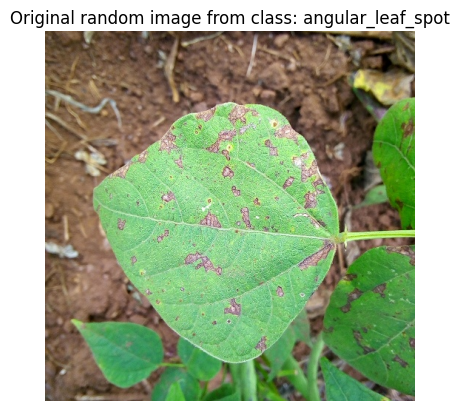

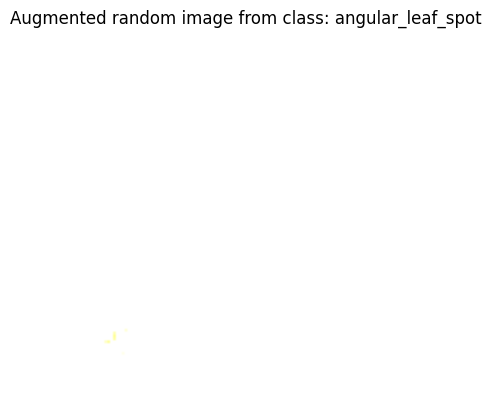

In [18]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
print(img.shape)
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
img = tf.image.resize(img, [128,128], preserve_aspect_ratio=True)
print(img.shape)
augmented_img = data_augmentation_train_new(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
print("augmented_img before reshape --> ",augmented_img.shape)
augmented_img = tf.image.resize(augmented_img, [128,128])# , preserve_aspect_ratio=True)
print("augmented_img.shape --> ",augmented_img.shape)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [19]:
cnn_model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(128,128,3)),
    data_augmentation_train_new,
    #resize_and_rescale,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = cnn_model.fit(train_data, validation_data=val_data, epochs=25)

Epoch 1/25
33/33 [==============================] - 29s 759ms/step - loss: 1.0928 - accuracy: 0.3752 - val_loss: 1.1050 - val_accuracy: 0.3383
Epoch 2/25
33/33 [==============================] - 24s 713ms/step - loss: 1.0613 - accuracy: 0.4420 - val_loss: 1.0505 - val_accuracy: 0.4211
Epoch 3/25
33/33 [==============================] - 25s 750ms/step - loss: 1.0078 - accuracy: 0.5000 - val_loss: 1.0407 - val_accuracy: 0.4812
Epoch 4/25
33/33 [==============================] - 26s 767ms/step - loss: 0.9408 - accuracy: 0.5368 - val_loss: 0.9081 - val_accuracy: 0.5940
Epoch 5/25
33/33 [==============================] - 25s 736ms/step - loss: 0.9419 - accuracy: 0.5513 - val_loss: 0.9628 - val_accuracy: 0.5038
Epoch 6/25
33/33 [==============================] - 25s 740ms/step - loss: 0.8483 - accuracy: 0.6344 - val_loss: 0.8632 - val_accuracy: 0.6391
Epoch 7/25
33/33 [==============================] - 25s 738ms/step - loss: 0.8445 - accuracy: 0.6296 - val_loss: 0.9561 - val_accuracy: 0.5414

In [22]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_1 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 32)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                 

In [23]:
test_pred = cnn_model.predict(test_data)

4/4 [==============================] - 1s 163ms/step


In [24]:
for img, label in test_data.take(1):
  print(img.shape,label.shape)
  plt.figure()
  plt.imshow(img) # requires normalization after augmentation
  orig_class = class_names[label.argmax()]
  plt.title(f"Augmented random image from class: {orig_class}")
  plt.axis(False);

(32, 128, 128, 3) (32, 3)


In [25]:
test_pred

array([[5.77671587e-01, 2.33806938e-01, 1.88521564e-01],
       [4.14599389e-01, 5.19412518e-01, 6.59880489e-02],
       [2.17004687e-01, 7.56324530e-01, 2.66706813e-02],
       [2.83024576e-03, 8.54414515e-03, 9.88625646e-01],
       [9.48169008e-02, 7.98289120e-01, 1.06893972e-01],
       [9.15417895e-02, 6.94016963e-02, 8.39056492e-01],
       [1.98326886e-01, 8.35471824e-02, 7.18125939e-01],
       [1.94947533e-02, 2.81942785e-02, 9.52310920e-01],
       [8.03588271e-01, 1.95232525e-01, 1.17927964e-03],
       [2.44123186e-03, 8.70595407e-03, 9.88852739e-01],
       [3.57144326e-02, 8.24054182e-01, 1.40231311e-01],
       [8.99744213e-01, 9.45132300e-02, 5.74245350e-03],
       [5.00961959e-01, 1.34842560e-01, 3.64195526e-01],
       [1.20926939e-01, 7.27723956e-01, 1.51349142e-01],
       [3.84290010e-01, 1.92931801e-01, 4.22778159e-01],
       [1.09937392e-01, 1.51998356e-01, 7.38064229e-01],
       [9.70666289e-01, 2.59310137e-02, 3.40269273e-03],
       [1.14746451e-01, 1.69670

In [26]:
predict_label = tf.math.argmax(test_pred, axis=1)

In [27]:
predict_label

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2,
       2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2])>

In [28]:
test_labels=[]
test_images=[]
for images, labels in test_data.unbatch():
  test_images.append(images.numpy())
  test_labels.append(labels.numpy())

In [29]:
test_labels[0]

array([0., 0., 1.], dtype=float32)

In [30]:
!ls test

angular_leaf_spot  bean_rust  healthy


In [31]:
for dirpath, dirnames, filenames in os.walk("test"):
  #print("1 --> ",dirpath)
  #print("2 --> ",dirnames)
  #print("3 --> ",filenames)
  for name in filenames:
    print(os.path.join(dirpath, name))

test/healthy/healthy_test.16.jpg
test/healthy/healthy_test.32.jpg
test/healthy/healthy_test.21.jpg
test/healthy/healthy_test.5.jpg
test/healthy/healthy_test.8.jpg
test/healthy/healthy_test.6.jpg
test/healthy/healthy_test.13.jpg
test/healthy/healthy_test.41.jpg
test/healthy/healthy_test.33.jpg
test/healthy/healthy_test.11.jpg
test/healthy/healthy_test.24.jpg
test/healthy/healthy_test.34.jpg
test/healthy/healthy_test.7.jpg
test/healthy/healthy_test.36.jpg
test/healthy/healthy_test.29.jpg
test/healthy/healthy_test.10.jpg
test/healthy/healthy_test.37.jpg
test/healthy/healthy_test.31.jpg
test/healthy/healthy_test.15.jpg
test/healthy/healthy_test.25.jpg
test/healthy/healthy_test.23.jpg
test/healthy/healthy_test.14.jpg
test/healthy/healthy_test.2.jpg
test/healthy/healthy_test.35.jpg
test/healthy/healthy_test.39.jpg
test/healthy/healthy_test.26.jpg
test/healthy/healthy_test.40.jpg
test/healthy/healthy_test.12.jpg
test/healthy/healthy_test.18.jpg
test/healthy/healthy_test.0.jpg
test/healthy/hea

In [32]:
def load_and_prep_image(filename, img_shape=128):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [33]:
def pred_and_plot(model, filename, class_names):
  orig_classname = filename.split("/")[1]
  img = load_and_prep_image(filename)

  pred = cnn_model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Original Class :{orig_classname} - Prediction: {pred_class}")
  plt.axis(False);

In [34]:
!ls 'test/healthy/healthy_test.13.jpg'

test/healthy/healthy_test.13.jpg


1/1 [==============================] - 0s 178ms/step


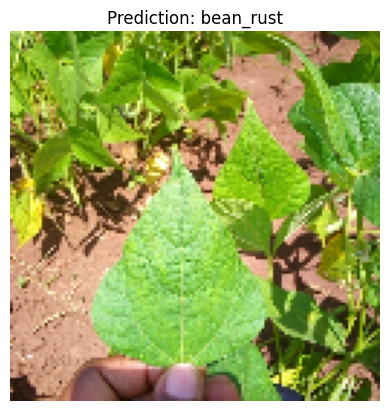

In [35]:
pred_and_plot(cnn_model,'test/healthy/healthy_test.13.jpg',class_names)

In [ ]:
def pred_and_plot_multiple(model, test_data, test_pred, number_of_image=15):
  fig, ax = plt.subplots(5, 3, figsize=(6,14))
